# Feature Engineering 

## Import necessary libraries and cleaned data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_csv('Cleaned_data.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,unknown,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
Unnamed: 0       21597 non-null int64
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
basement         21597 non-null float6

## Change categorical variables to objects and apply get_dummies

In [7]:
df.grade=df.grade.astype(object)

In [8]:
df.zipcode=df.zipcode.astype(object)

In [9]:
df.bedrooms =df.bedrooms.astype(object)

In [10]:
df.basement= df.basement.astype(object)

In [11]:
feats = ['price','bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15','basement']
df1 = df[feats]
df1 = pd.get_dummies(df1, drop_first=True)
df1.head()

,price,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,basement_1.0
0,221900.0,1.00,1180,5650,1.0,3,1180,0.0,1955,0.0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,2.25,2570,7242,2.0,3,2170,400.0,1951,1991.0,...,0,0,0,0,0,0,0,0,0,1
2,180000.0,1.00,770,10000,1.0,3,770,0.0,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,3.00,1960,5000,1.0,5,1050,910.0,1965,0.0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,2.00,1680,8080,1.0,3,1680,0.0,1987,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Here I am making sure variables are in the right format for statsmodel
subs = [('.0','')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col
df1.columns = [col_formatting(col) for col in df1.columns]
list(df1.columns)

['price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_33',
 'waterfront_1',
 'waterfront_unknown',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'view_unknown',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 

In [13]:
df1.head() #the data is formatted correctly for a model

,price,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,basement_1
0,221900.0,1.00,1180,5650,1.0,3,1180,0.0,1955,0.0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,2.25,2570,7242,2.0,3,2170,400.0,1951,1991.0,...,0,0,0,0,0,0,0,0,0,1
2,180000.0,1.00,770,10000,1.0,3,770,0.0,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,3.00,1960,5000,1.0,5,1050,910.0,1965,0.0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,2.00,1680,8080,1.0,3,1680,0.0,1987,0.0,...,0,0,0,0,0,0,0,0,0,0


# Begin Modeling

Import necessary libraries

In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

## Create baseline model

Define independent and dependent variables for model 

In [15]:
outcome = 'price'
x_cols = list(df1.columns)
x_cols.remove(outcome)


Create training and test data

In [16]:
train, test = train_test_split(df1, random_state=4)

In [17]:
print(len(train), len(test))

16197 5400


Run first model

In [18]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     726.6
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:25:49   Log-Likelihood:            -2.1617e+05
No. Observations:               16197   AIC:                         4.326e+05
Df Residuals:                   16088   BIC:                         4.334e+05
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            6.77e+05   2.06e+05      3.282      0.001    2.73e+05    1.08e+06
bathrooms             2.8e+04   2927.760      9.563      0.000    2.23e+04    3.37e+04
sqft_living           81.3683     15.739      5.170      0.000      50.518     112.218
sqft_lot               0.2424      0.043      5.673      0.000       0.159       0.326
floors             -3.149e+04   3490.581     -9.023      0.000   -3.83e+04   -2.47e+04
condition           2.925e+04   2103.736     13.904      0.000    2.51e+04    3.34e+04
sqft_above            86.6973     15.740      5.508      0.000      55.845     117.550
sqft_basement         40.9229     16.298      2.511      0.012       8.978      72.868
yr_built            -342.0894     71.012     -4.817      0.000    -481.280    -202.898
yr_renovated          34.1960      3.494      9.788      0.000      27.348      41.044
sqft_living15         17.2628      3.204      5.387      0.000      10.982      23.544
sqft_lot15            -0.1770      0.068     -2.611      0.009      -0.310      -0.044
bedrooms_2          9839.5991   1.33e+04      0.741      0.458   -1.62e+04    3.59e+04
bedrooms_3          8297.8915   1.33e+04      0.626      0.531   -1.77e+04    3.43e+04
bedrooms_4           -1.6e+04   1.35e+04     -1.181      0.238   -4.26e+04    1.06e+04
bedrooms_5         -3.062e+04   1.43e+04     -2.135      0.033   -5.87e+04   -2504.076
bedrooms_6         -4.239e+04   1.75e+04     -2.422      0.015   -7.67e+04   -8089.585
bedrooms_7         -1.162e+05   3.23e+04     -3.597      0.000    -1.8e+05   -5.29e+04
bedrooms_8         -6.486e+04   5.58e+04     -1.163      0.245   -1.74e+05    4.45e+04
bedrooms_9         -2.729e+05      7e+04     -3.896      0.000    -4.1e+05   -1.36e+05
bedrooms_10        -3.814e+05   1.09e+05     -3.506      0.000   -5.95e+05   -1.68e+05
bedrooms_11        -1.156e+05   1.53e+05     -0.756      0.450   -4.16e+05    1.84e+05
bedrooms_33        -2.208e-10   8.91e-10     -0.248      0.804   -1.97e-09    1.53e-09
waterfront_1        5.745e+05   1.82e+04     31.648      0.000    5.39e+05     6.1e+05
waterfront_unknown -2533.1637   3805.782     -0.666      0.506   -9992.920    4926.592
view_1              8.556e+04   9957.814      8.592      0.000     6.6e+04    1.05e+05
view_2              6.563e+04   6118.197     10.728      0.000    5.36e+04    7.76e+04
view_3              1.486e+05   8297.335     17.915      0.000    1.32e+05    1.65e+05
view_4              2.816e+05   1.25e+04     22.580      0.000    2.57e+05    3.06e+05
view_unknown        7.307e+04   2.28e+04      3.210      0.001    2.84e+04    1.18e+05
grade_4            -1.341e+05   1.56e+05     -0.860      0.390    -4.4e+05    1.72e+05
grade_5             -1.89e+05   1.53e+05     -1.234      0.217   -4.89e+05    1.11e+05
grade_6            -1.925e+05   1.53e+

In [19]:
from math import sqrt
X_train = train[x_cols]
X_test = test[x_cols]
y_train = train['price']
y_test = test['price']
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
y_hat_train = linreg.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, y_hat_train))
print('RMSE: ', rmse)

RMSE:  151374.62942614255


## Note RMSE and Rsquared values

### Rsquared = .830 and RMSE = 151374.629

R**2 is high, which is good, however, this may be because there are a lot of features. There are many features with large p-values and the RMSE is high indicating that the model is not yet a good fit

## Begin iterative modeling process

I began by doing a round of removing features with p_values of over .05

In [20]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

110 84
['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,6.77e+05,2.06e+05,3.282,0.001,2.73e+05,1.08e+06
bathrooms,2.8e+04,2927.760,9.563,0.000,2.23e+04,3.37e+04
sqft_living,81.3683,15.739,5.170,0.000,50.518,112.218
sqft_lot,0.2424,0.043,5.673,0.000,0.159,0.326
floors,-3.149e+04,3490.581,-9.023,0.000,-3.83e+04,-2.47e+04


In [21]:
# run the model again
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     819.2
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:25:50   Log-Likelihood:            -2.1705e+05
No. Observations:               16197   AIC:                         4.343e+05
Df Residuals:                   16112   BIC:                         4.349e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.746e+05   1.39e+05     -1.256      0.209   -4.47e+05    9.78e+04
bathrooms      2.301e+04   3029.340      7.597      0.000    1.71e+04     2.9e+04
sqft_living      96.1719     16.555      5.809      0.000      63.723     128.621
sqft_lot          0.3075      0.045      6.843      0.000       0.219       0.396
floors        -3.797e+04   3641.234    -10.428      0.000   -4.51e+04   -3.08e+04
condition      2.618e+04   2201.847     11.890      0.000    2.19e+04    3.05e+04
sqft_above      118.0102     16.576      7.119      0.000      85.520     150.501
sqft_basement    37.0585     17.181      2.157      0.031       3.381      70.736
yr_built        -45.6440     70.405     -0.648      0.517    -183.645      92.357
yr_renovated     32.1420      3.665      8.770      0.000      24.958      39.326
sqft_living15    39.4110      3.239     12.168      0.000      33.063      45.759
sqft_lot15       -0.1753      0.071     -2.479      0.013      -0.314      -0.037
bedrooms_5    -4.017e+04   5218.228     -7.698      0.000   -5.04e+04   -2.99e+04
bedrooms_6    -6.538e+04   1.16e+04     -5.619      0.000   -8.82e+04   -4.26e+04
bedrooms_7    -1.329e+05   3.08e+04     -4.321      0.000   -1.93e+05   -7.26e+04
bedrooms_9    -2.841e+05   7.23e+04     -3.927      0.000   -4.26e+05   -1.42e+05
bedrooms_10   -4.228e+05   1.14e+05     -3.715      0.000   -6.46e+05      -2e+05
waterfront_1   5.848e+05   1.89e+04     30.933      0.000    5.48e+05    6.22e+05
view_1          8.94e+04   1.05e+04      8.546      0.000    6.89e+04     1.1e+05
view_2         7.905e+04   6408.274     12.336      0.000    6.65e+04    9.16e+04
view_3         1.674e+05   8688.076     19.273      0.000     1.5e+05    1.84e+05
view_4         3.235e+05   1.31e+04     24.724      0.000    2.98e+05    3.49e+05
view_unknown   9.145e+04    2.4e+04      3.810      0.000    4.44e+04    1.38e+05
grade_12       5.563e+05   2.04e+04     27.218      0.000    5.16e+05    5.96e+05
grade_13        1.67e+06   5.19e+04     32.158      0.000    1.57e+06    1.77e+06
zipcode_98004  8.134e+05   1.12e+04     72.411      0.000    7.91e+05    8.35e+05
zipcode_98005  3.338e+05   1.49e+04     22.431      0.000    3.05e+05    3.63e+05
zipcode_98006  2.851e+05   9297.586     30.659      0.000    2.67e+05    3.03e+05
zipcode_98007   2.75e+05   1.63e+04     16.888      0.000    2.43e+05    3.07e+05
zipcode_98008  2.664e+05   1.15e+04     23.066      0.000    2.44e+05    2.89e+05
zipcode_98010  5.273e+04    1.8e+04      2.932      0.003    1.75e+04     8.8e+04
zipcode_98011  1.296e+05   1.34e+04      9.640      0.000    1.03e+05    1.56e+05
zipcode_98014  1.004e+05   1.73e+04      5.793      0.000    6.64e+04    1.34e+05
zipcode_98019  7.682e+04   1.43e+04      5.367      0.000    4.88e+04    1.05e+05
zipcode_98023 -2.126e+04   8883.187     -2.393   

R**2 went down a little, but the remaining features have low p-values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E8366A438>]],
      dtype=object)

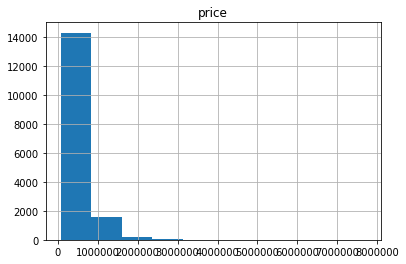

In [22]:
# I can see that the data for price, the dependent variable is skewed
train.hist('price')

In [23]:
# I will log transform it to make it more normal
train['price'] = np.log(train['price'])

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E83606D68>]],
      dtype=object)

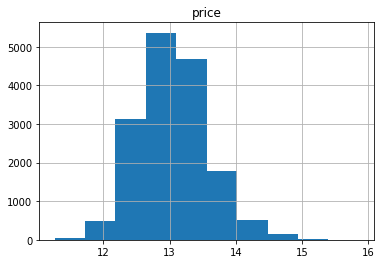

In [24]:
train.hist('price') #price is now more normal

In [25]:
# run the model again
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:25:50   Log-Likelihood:                 3573.6
No. Observations:               16197   AIC:                            -6977.
Df Residuals:                   16112   BIC:                            -6323.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.9284      0.169     64.773      0.000      10.598      11.259
bathrooms         0.0507      0.004     13.773      0.000       0.043       0.058
sqft_living       0.0002   2.01e-05      8.621      0.000       0.000       0.000
sqft_lot       6.825e-07   5.45e-08     12.511      0.000    5.76e-07    7.89e-07
floors           -0.0255      0.004     -5.778      0.000      -0.034      -0.017
condition         0.0578      0.003     21.626      0.000       0.053       0.063
sqft_above        0.0001   2.01e-05      5.080      0.000    6.28e-05       0.000
sqft_basement -5.318e-05   2.09e-05     -2.549      0.011   -9.41e-05   -1.23e-05
yr_built          0.0003   8.55e-05      3.612      0.000       0.000       0.000
yr_renovated   4.791e-05   4.45e-06     10.767      0.000    3.92e-05    5.66e-05
sqft_living15     0.0001   3.93e-06     29.376      0.000       0.000       0.000
sqft_lot15     1.314e-07   8.58e-08      1.531      0.126   -3.69e-08       3e-07
bedrooms_5       -0.0567      0.006     -8.957      0.000      -0.069      -0.044
bedrooms_6       -0.1080      0.014     -7.644      0.000      -0.136      -0.080
bedrooms_7       -0.2971      0.037     -7.955      0.000      -0.370      -0.224
bedrooms_9       -0.4074      0.088     -4.639      0.000      -0.580      -0.235
bedrooms_10      -0.4120      0.138     -2.981      0.003      -0.683      -0.141
waterfront_1      0.4843      0.023     21.101      0.000       0.439       0.529
view_1            0.1232      0.013      9.703      0.000       0.098       0.148
view_2            0.1204      0.008     15.476      0.000       0.105       0.136
view_3            0.1905      0.011     18.060      0.000       0.170       0.211
view_4            0.3152      0.016     19.839      0.000       0.284       0.346
view_unknown      0.0472      0.029      1.619      0.106      -0.010       0.104
grade_12         -0.0907      0.025     -3.657      0.000      -0.139      -0.042
grade_13         -0.1898      0.063     -3.011      0.003      -0.313      -0.066
zipcode_98004     1.0813      0.014     79.294      0.000       1.055       1.108
zipcode_98005     0.7467      0.018     41.327      0.000       0.711       0.782
zipcode_98006     0.6201      0.011     54.940      0.000       0.598       0.642
zipcode_98007     0.6547      0.020     33.121      0.000       0.616       0.693
zipcode_98008     0.6338      0.014     45.205      0.000       0.606       0.661
zipcode_98010     0.1507      0.022      6.903      0.000       0.108       0.193
zipcode_98011     0.4021      0.016     24.637      0.000       0.370       0.434
zipcode_98014     0.2207      0.021     10.489      0.000       0.179       0.262
zipcode_98019     0.2442      0.017     14.054      0.000       0.210       0.278
zipcode_98023    -0.0568      0.011     -5.268   

R**2 went up a little, but there are a few features with high p-values. Before removing them I am going to check for multicollinearity 

In [26]:
X = df1[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 25.817739176598995),
 ('sqft_living', 905.5180139152352),
 ('sqft_lot', 2.3827803266246073),
 ('floors', 19.08591090189227),
 ('condition', 31.686958769655337),
 ('sqft_above', 682.6107666395993),
 ('sqft_basement', 51.797317303064595),
 ('yr_built', 69.3137595919538),
 ('yr_renovated', 1.0761534901902252),
 ('sqft_living15', 29.104165224760838),
 ('sqft_lot15', 2.696602277873799),
 ('bedrooms_5', 1.2436515589876307),
 ('bedrooms_6', 1.0750007124104528),
 ('bedrooms_7', 1.0271184982912513),
 ('bedrooms_9', 1.0142632201435395),
 ('bedrooms_10', 1.005030669891497),
 ('waterfront_1', 1.5211902369363468),
 ('view_1', 1.0637358827257453),
 ('view_2', 1.1425319825409426),
 ('view_3', 1.1306884270461977),
 ('view_4', 1.6218505732529327),
 ('view_unknown', 1.0071066688223582),
 ('grade_12', 1.0971527853095535),
 ('grade_13', 1.0462607307792846),
 ('zipcode_98004', 1.152819993532745),
 ('zipcode_98005', 1.0777785190003952),
 ('zipcode_98006', 1.2532936718126546),
 ('zipcode_98007

In [27]:
# I am going to remove features with vif values greater than 6
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 6]
print(len(vif_scores), len(x_cols))

84 76


In [28]:
#run the model again
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     400.8
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:25:59   Log-Likelihood:                -3996.8
No. Observations:               16197   AIC:                             8148.
Df Residuals:                   16120   BIC:                             8740.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.4571      0.007   1826.016      0.000      12.444      12.470
sqft_lot       1.007e-06   8.67e-08     11.614      0.000    8.37e-07    1.18e-06
yr_renovated   5.179e-05   6.76e-06      7.662      0.000    3.85e-05     6.5e-05
sqft_lot15     1.029e-06   1.36e-07      7.555      0.000    7.62e-07     1.3e-06
bedrooms_5        0.1956      0.010     20.398      0.000       0.177       0.214
bedrooms_6        0.1966      0.022      8.958      0.000       0.154       0.240
bedrooms_7        0.2278      0.059      3.867      0.000       0.112       0.343
bedrooms_9        0.2326      0.139      1.668      0.095      -0.041       0.506
bedrooms_10      -0.1733      0.220     -0.787      0.431      -0.605       0.258
waterfront_1      0.4486      0.037     12.263      0.000       0.377       0.520
view_1            0.2775      0.020     13.792      0.000       0.238       0.317
view_2            0.2968      0.012     24.392      0.000       0.273       0.321
view_3            0.4630      0.016     28.280      0.000       0.431       0.495
view_4            0.6267      0.025     25.147      0.000       0.578       0.676
view_unknown      0.1087      0.046      2.340      0.019       0.018       0.200
grade_12          0.6830      0.039     17.671      0.000       0.607       0.759
grade_13          1.0409      0.099     10.482      0.000       0.846       1.236
zipcode_98004     1.3669      0.021     63.799      0.000       1.325       1.409
zipcode_98005     0.9489      0.029     33.174      0.000       0.893       1.005
zipcode_98006     0.8770      0.018     49.871      0.000       0.843       0.911
zipcode_98007     0.7773      0.031     24.706      0.000       0.716       0.839
zipcode_98008     0.6433      0.022     28.840      0.000       0.600       0.687
zipcode_98010     0.2189      0.035      6.289      0.000       0.151       0.287
zipcode_98011     0.5070      0.026     19.531      0.000       0.456       0.558
zipcode_98014     0.2095      0.034      6.246      0.000       0.144       0.275
zipcode_98019     0.3168      0.028     11.453      0.000       0.263       0.371
zipcode_98023    -0.0253      0.017     -1.474      0.141      -0.059       0.008
zipcode_98024     0.3646      0.040      9.052      0.000       0.286       0.444
zipcode_98027     0.6321      0.019     33.776      0.000       0.595       0.669
zipcode_98028     0.4529      0.022     20.302      0.000       0.409       0.497
zipcode_98029     0.7816      0.021     38.021      0.000       0.741       0.822
zipcode_98033     0.9143      0.018     49.582      0.000       0.878       0.950
zipcode_98034     0.5140      0.017     29.912      0.000       0.480       0.548
zipcode_98038     0.2381      0.016     14.602      0.000       0.206       0.270
zipcode_98039     1.6705      0.050     33.184   

This drastically lowered the R**2, but that is expected as so many features are taken away. I will do another round of removing high p-values

In [29]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

77 70
['sqft_lot', 'yr_renovated', 'sqft_lot15', 'bedrooms_5', 'bedrooms_6']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,12.4571,0.007,1826.016,0.0,12.444,12.470
sqft_lot,1.007e-06,8.67e-08,11.614,0.0,8.37e-07,1.18e-06
yr_renovated,5.179e-05,6.76e-06,7.662,0.0,3.85e-05,6.5e-05
sqft_lot15,1.029e-06,1.36e-07,7.555,0.0,7.62e-07,1.3e-06
bedrooms_5,0.1956,0.010,20.398,0.0,0.177,0.214


In [30]:
#run the model again
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     434.9
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:25:59   Log-Likelihood:                -4002.3
No. Observations:               16197   AIC:                             8147.
Df Residuals:                   16126   BIC:                             8693.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.4555      0.006   2063.943      0.000      12.444      12.467
sqft_lot       1.009e-06   8.67e-08     11.642      0.000    8.39e-07    1.18e-06
yr_renovated   5.202e-05   6.76e-06      7.695      0.000    3.88e-05    6.53e-05
sqft_lot15     1.028e-06   1.36e-07      7.549      0.000    7.61e-07    1.29e-06
bedrooms_5        0.1955      0.010     20.393      0.000       0.177       0.214
bedrooms_6        0.1969      0.022      8.973      0.000       0.154       0.240
bedrooms_7        0.2278      0.059      3.866      0.000       0.112       0.343
waterfront_1      0.4482      0.037     12.252      0.000       0.376       0.520
view_1            0.2777      0.020     13.801      0.000       0.238       0.317
view_2            0.2967      0.012     24.386      0.000       0.273       0.320
view_3            0.4628      0.016     28.268      0.000       0.431       0.495
view_4            0.6267      0.025     25.144      0.000       0.578       0.676
view_unknown      0.1075      0.046      2.313      0.021       0.016       0.199
grade_12          0.6831      0.039     17.671      0.000       0.607       0.759
grade_13          1.0404      0.099     10.475      0.000       0.846       1.235
zipcode_98004     1.3678      0.021     64.627      0.000       1.326       1.409
zipcode_98005     0.9506      0.028     33.440      0.000       0.895       1.006
zipcode_98006     0.8787      0.017     50.823      0.000       0.845       0.913
zipcode_98007     0.7790      0.031     24.884      0.000       0.718       0.840
zipcode_98008     0.6450      0.022     29.219      0.000       0.602       0.688
zipcode_98010     0.2205      0.035      6.353      0.000       0.152       0.288
zipcode_98011     0.5087      0.026     19.747      0.000       0.458       0.559
zipcode_98014     0.2109      0.033      6.309      0.000       0.145       0.276
zipcode_98019     0.3183      0.027     11.576      0.000       0.264       0.372
zipcode_98024     0.3661      0.040      9.109      0.000       0.287       0.445
zipcode_98027     0.6338      0.018     34.348      0.000       0.598       0.670
zipcode_98028     0.4546      0.022     20.588      0.000       0.411       0.498
zipcode_98029     0.7832      0.020     38.554      0.000       0.743       0.823
zipcode_98033     0.9160      0.018     50.427      0.000       0.880       0.952
zipcode_98034     0.5157      0.017     30.552      0.000       0.483       0.549
zipcode_98038     0.2397      0.016     14.964      0.000       0.208       0.271
zipcode_98039     1.6721      0.050     33.276      0.000       1.574       1.771
zipcode_98040     1.1428      0.023     50.286      0.000       1.098       1.187
zipcode_98045     0.2943      0.025     11.787      0.000       0.245       0.343
zipcode_98052     0.8020      0.016     49.165   

R**2 was not affected, but now all features have a low p-value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E83E98080>]],
      dtype=object)

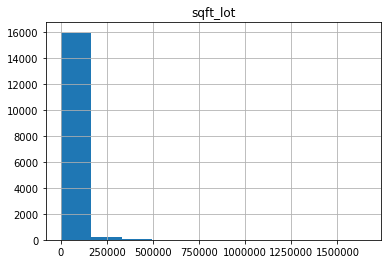

In [31]:
# Now I'm noting that the data for sqft_lot and sqft_lot15 are skewed
train.hist('sqft_lot')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E829A9A20>]],
      dtype=object)

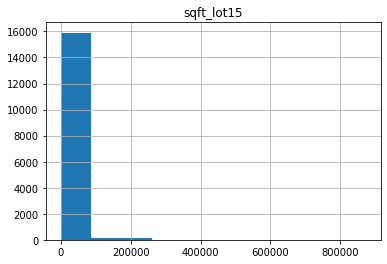

In [32]:
train.hist('sqft_lot15')

In [33]:
# I will log transform them
non_normal = ['sqft_lot','sqft_lot15']
for feat in non_normal:
    train[feat] = train[feat].map(lambda x: np.log(x))

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E83D64898>]],
      dtype=object)

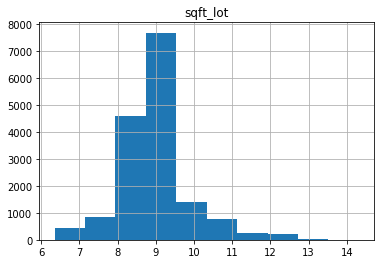

In [34]:
# Now they are more normalized
train.hist('sqft_lot')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E84C741D0>]],
      dtype=object)

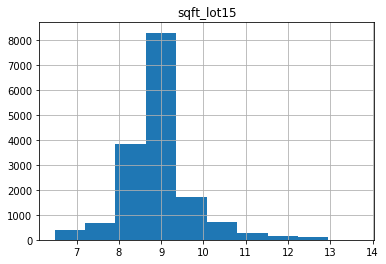

In [35]:
train.hist('sqft_lot15')

In [36]:
#run the model again
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     468.6
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:26:00   Log-Likelihood:                -3601.3
No. Observations:               16197   AIC:                             7345.
Df Residuals:                   16126   BIC:                             7891.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.3314      0.035    327.246      0.000      11.264      11.399
sqft_lot          0.1318      0.007     19.312      0.000       0.118       0.145
yr_renovated    4.28e-05    6.6e-06      6.483      0.000    2.99e-05    5.57e-05
sqft_lot15       -0.0056      0.008     -0.728      0.467      -0.021       0.009
bedrooms_5        0.1785      0.009     19.060      0.000       0.160       0.197
bedrooms_6        0.1669      0.021      7.782      0.000       0.125       0.209
bedrooms_7        0.1980      0.057      3.445      0.001       0.085       0.311
waterfront_1      0.4290      0.036     12.015      0.000       0.359       0.499
view_1            0.2541      0.020     12.934      0.000       0.216       0.293
view_2            0.2705      0.012     22.729      0.000       0.247       0.294
view_3            0.4386      0.016     27.441      0.000       0.407       0.470
view_4            0.5887      0.024     24.182      0.000       0.541       0.636
view_unknown      0.1032      0.045      2.276      0.023       0.014       0.192
grade_12          0.6379      0.038     16.904      0.000       0.564       0.712
grade_13          0.9684      0.097      9.993      0.000       0.778       1.158
zipcode_98004     1.3532      0.021     65.536      0.000       1.313       1.394
zipcode_98005     0.9142      0.028     32.938      0.000       0.860       0.969
zipcode_98006     0.8618      0.017     51.130      0.000       0.829       0.895
zipcode_98007     0.7781      0.031     25.483      0.000       0.718       0.838
zipcode_98008     0.6504      0.022     30.205      0.000       0.608       0.693
zipcode_98010     0.1702      0.034      5.023      0.000       0.104       0.237
zipcode_98011     0.5105      0.025     20.318      0.000       0.461       0.560
zipcode_98014     0.1930      0.032      5.956      0.000       0.129       0.257
zipcode_98019     0.3127      0.027     11.673      0.000       0.260       0.365
zipcode_98024     0.3158      0.039      8.057      0.000       0.239       0.393
zipcode_98027     0.6491      0.018     36.114      0.000       0.614       0.684
zipcode_98028     0.4484      0.022     20.822      0.000       0.406       0.491
zipcode_98029     0.8423      0.020     42.228      0.000       0.803       0.881
zipcode_98033     0.9236      0.018     52.125      0.000       0.889       0.958
zipcode_98034     0.5282      0.016     32.071      0.000       0.496       0.560
zipcode_98038     0.2575      0.016     16.480      0.000       0.227       0.288
zipcode_98039     1.6345      0.049     33.329      0.000       1.538       1.731
zipcode_98040     1.1250      0.022     50.754      0.000       1.082       1.168
zipcode_98045     0.2576      0.024     10.552      0.000       0.210       0.305
zipcode_98052     0.8051      0.016     50.607   

R**2 went up slightly, but sqft_lot15 p-value went up so I will remove it from the model

In [37]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

71 69
['sqft_lot', 'yr_renovated', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,11.3314,0.035,327.246,0.000,11.264,11.399
sqft_lot,0.1318,0.007,19.312,0.000,0.118,0.145
yr_renovated,4.28e-05,6.6e-06,6.483,0.000,2.99e-05,5.57e-05
sqft_lot15,-0.0056,0.008,-0.728,0.467,-0.021,0.009
bedrooms_5,0.1785,0.009,19.060,0.000,0.160,0.197


In [38]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     475.4
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:26:00   Log-Likelihood:                -3601.6
No. Observations:               16197   AIC:                             7343.
Df Residuals:                   16127   BIC:                             7882.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.3202      0.031    364.984      0.000      11.259      11.381
sqft_lot          0.1274      0.003     38.383      0.000       0.121       0.134
yr_renovated   4.275e-05    6.6e-06      6.476      0.000    2.98e-05    5.57e-05
bedrooms_5        0.1786      0.009     19.069      0.000       0.160       0.197
bedrooms_6        0.1676      0.021      7.819      0.000       0.126       0.210
bedrooms_7        0.1984      0.057      3.451      0.001       0.086       0.311
waterfront_1      0.4282      0.036     11.998      0.000       0.358       0.498
view_1            0.2538      0.020     12.925      0.000       0.215       0.292
view_2            0.2704      0.012     22.722      0.000       0.247       0.294
view_3            0.4384      0.016     27.433      0.000       0.407       0.470
view_4            0.5885      0.024     24.175      0.000       0.541       0.636
view_unknown      0.1026      0.045      2.264      0.024       0.014       0.192
grade_12          0.6378      0.038     16.902      0.000       0.564       0.712
grade_13          0.9681      0.097      9.990      0.000       0.778       1.158
zipcode_98004     1.3528      0.021     65.545      0.000       1.312       1.393
zipcode_98005     0.9136      0.028     32.932      0.000       0.859       0.968
zipcode_98006     0.8615      0.017     51.126      0.000       0.828       0.895
zipcode_98007     0.7780      0.031     25.481      0.000       0.718       0.838
zipcode_98008     0.6502      0.022     30.200      0.000       0.608       0.692
zipcode_98010     0.1691      0.034      4.996      0.000       0.103       0.236
zipcode_98011     0.5105      0.025     20.317      0.000       0.461       0.560
zipcode_98014     0.1913      0.032      5.919      0.000       0.128       0.255
zipcode_98019     0.3121      0.027     11.656      0.000       0.260       0.365
zipcode_98024     0.3147      0.039      8.035      0.000       0.238       0.391
zipcode_98027     0.6489      0.018     36.107      0.000       0.614       0.684
zipcode_98028     0.4484      0.022     20.826      0.000       0.406       0.491
zipcode_98029     0.8432      0.020     42.354      0.000       0.804       0.882
zipcode_98033     0.9235      0.018     52.121      0.000       0.889       0.958
zipcode_98034     0.5283      0.016     32.078      0.000       0.496       0.561
zipcode_98038     0.2575      0.016     16.480      0.000       0.227       0.288
zipcode_98039     1.6335      0.049     33.322      0.000       1.537       1.730
zipcode_98040     1.1246      0.022     50.753      0.000       1.081       1.168
zipcode_98045     0.2569      0.024     10.532      0.000       0.209       0.305
zipcode_98052     0.8051      0.016     50.607      0.000       0.774       0.836
zipcode_98053     0.7910      0.019     42.627   

R**2 was not negatively affected and now all p-values are less than .05

# Check for Linear Model Assumptions

Text(0.5, 1.0, 'QQplot')

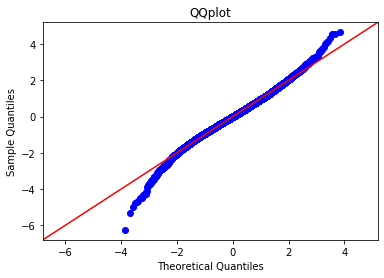

In [51]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQplot')

The data in the model follow the normality line relatively well, although not perfectly

Text(0.5, 1.0, 'Check for Homoscedasticity')

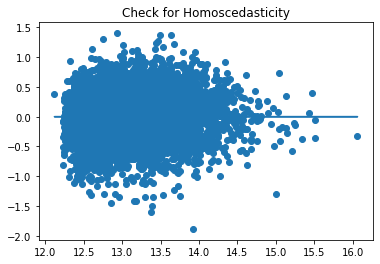

In [52]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

plt.title('Check for Homoscedasticity')

Homoscedasticity is not perfectly met with this data. This indicates that a linear regression model may not be the best model for the data

# Test model with test set

In [41]:
# I make the same log transformations to the test data as I did with the training set
non_normal = ['sqft_lot','sqft_lot15','price']
for feat in non_normal:
    test[feat] = test[feat].map(lambda x: np.log(x))

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E84C9E588>]],
      dtype=object)

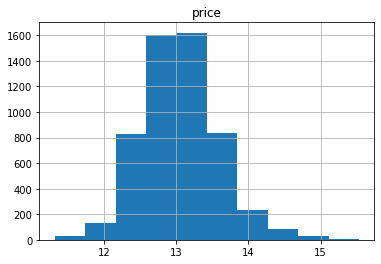

In [42]:
test.hist('price')


In [43]:
# I set my train and test variables and fit my training set to the model
X_train = train[x_cols]
X_test = test[x_cols]
y_train = train['price']
y_test = test['price']
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
#calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [45]:
#calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.09134107440932543
Test Mean Squared Error: 0.09079724970292993


The mean squared error is very low and the difference between the train and test data is not very large, this is a sign that the model generalizes relatively well.

In [46]:
# Now I will cross-validate my model with my training set to check that my model works similarly on different subsets of data
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X_train, y_train, cv=5, scoring=mse)

In [47]:
cv_5_results.mean() #The mean of a 5-fold cross-validation

0.0923109294716461

The mean mse from the cross-validation is relatively close to the test mse. This mean is closer to the model's actual mse. Since it is similar to the test mse, it shows that the model works similarly on different subsets of data.

# Final Model

The final RMSE of the model is .302 and the final R**2 is .670. I will save it and pickle the final model.

In [48]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
y_hat_train = final_model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, y_hat_train))
print('RMSE: ', rmse)

RMSE:  0.3022268591792024


In [49]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     475.4
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:26:02   Log-Likelihood:                -3601.6
No. Observations:               16197   AIC:                             7343.
Df Residuals:                   16127   BIC:                             7882.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.3202      0.031    364.984      0.000      11.259      11.381
sqft_lot          0.1274      0.003     38.383      0.000       0.121       0.134
yr_renovated   4.275e-05    6.6e-06      6.476      0.000    2.98e-05    5.57e-05
bedrooms_5        0.1786      0.009     19.069      0.000       0.160       0.197
bedrooms_6        0.1676      0.021      7.819      0.000       0.126       0.210
bedrooms_7        0.1984      0.057      3.451      0.001       0.086       0.311
waterfront_1      0.4282      0.036     11.998      0.000       0.358       0.498
view_1            0.2538      0.020     12.925      0.000       0.215       0.292
view_2            0.2704      0.012     22.722      0.000       0.247       0.294
view_3            0.4384      0.016     27.433      0.000       0.407       0.470
view_4            0.5885      0.024     24.175      0.000       0.541       0.636
view_unknown      0.1026      0.045      2.264      0.024       0.014       0.192
grade_12          0.6378      0.038     16.902      0.000       0.564       0.712
grade_13          0.9681      0.097      9.990      0.000       0.778       1.158
zipcode_98004     1.3528      0.021     65.545      0.000       1.312       1.393
zipcode_98005     0.9136      0.028     32.932      0.000       0.859       0.968
zipcode_98006     0.8615      0.017     51.126      0.000       0.828       0.895
zipcode_98007     0.7780      0.031     25.481      0.000       0.718       0.838
zipcode_98008     0.6502      0.022     30.200      0.000       0.608       0.692
zipcode_98010     0.1691      0.034      4.996      0.000       0.103       0.236
zipcode_98011     0.5105      0.025     20.317      0.000       0.461       0.560
zipcode_98014     0.1913      0.032      5.919      0.000       0.128       0.255
zipcode_98019     0.3121      0.027     11.656      0.000       0.260       0.365
zipcode_98024     0.3147      0.039      8.035      0.000       0.238       0.391
zipcode_98027     0.6489      0.018     36.107      0.000       0.614       0.684
zipcode_98028     0.4484      0.022     20.826      0.000       0.406       0.491
zipcode_98029     0.8432      0.020     42.354      0.000       0.804       0.882
zipcode_98033     0.9235      0.018     52.121      0.000       0.889       0.958
zipcode_98034     0.5283      0.016     32.078      0.000       0.496       0.561
zipcode_98038     0.2575      0.016     16.480      0.000       0.227       0.288
zipcode_98039     1.6335      0.049     33.322      0.000       1.537       1.730
zipcode_98040     1.1246      0.022     50.753      0.000       1.081       1.168
zipcode_98045     0.2569      0.024     10.532      0.000       0.209       0.305
zipcode_98052     0.8051      0.016     50.607      0.000       0.774       0.836
zipcode_98053     0.7910      0.019     42.627   

In [50]:
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(final_model, f)